In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv.csv to housing.csv.csv


In [ ]:
import pandas as pd
housing = pd.read_csv('housing.csv.csv')


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


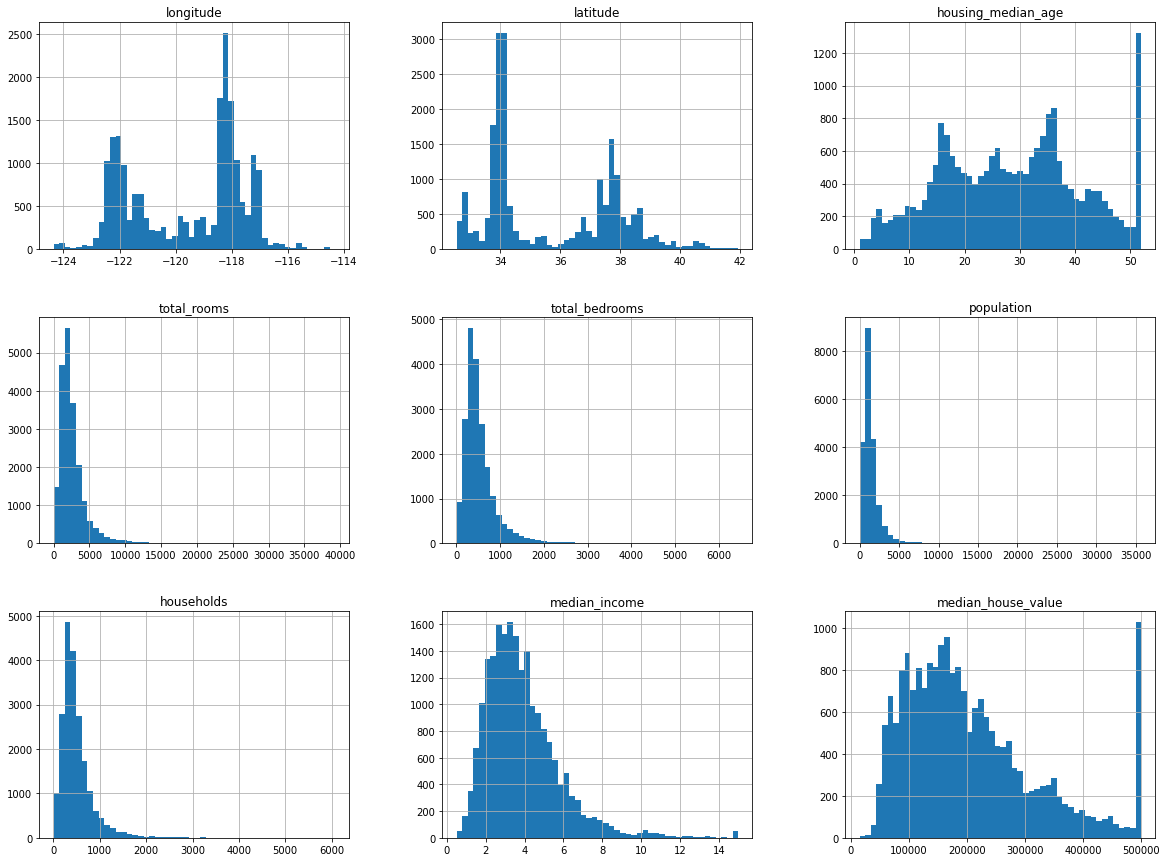

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
train_set.shape

(16512, 10)

In [ ]:
test_set.shape

(4128, 10)

In [ ]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


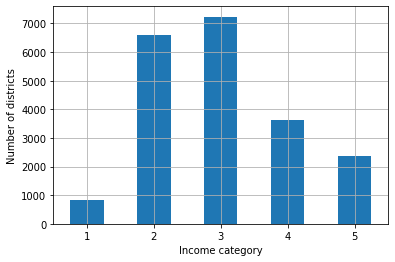

In [ ]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income category')
plt.ylabel('Number of districts')
plt.show()

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing['income_cat'],
    random_state=42)

In [ ]:
strat_train_set = strat_train_set.drop('income_cat', axis=1)
strat_test_set = strat_test_set.drop('income_cat', axis=1)

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [ ]:
strat_train_set.shape

(16512, 10)

In [ ]:
housing = strat_train_set.copy()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='longitude', ylabel='latitude'>

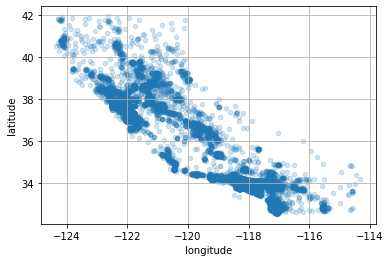

In [ ]:
housing.plot(kind='scatter', x='longitude',
             y='latitude', grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

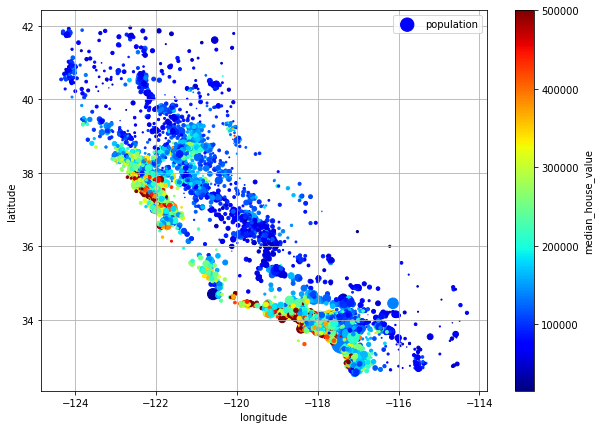

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude',
             grid=True, s=housing['population']/100,
             label='population', c='median_house_value',
             cmap='jet', colorbar=True, legend=True,
             sharex=False, figsize=(10, 7))

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

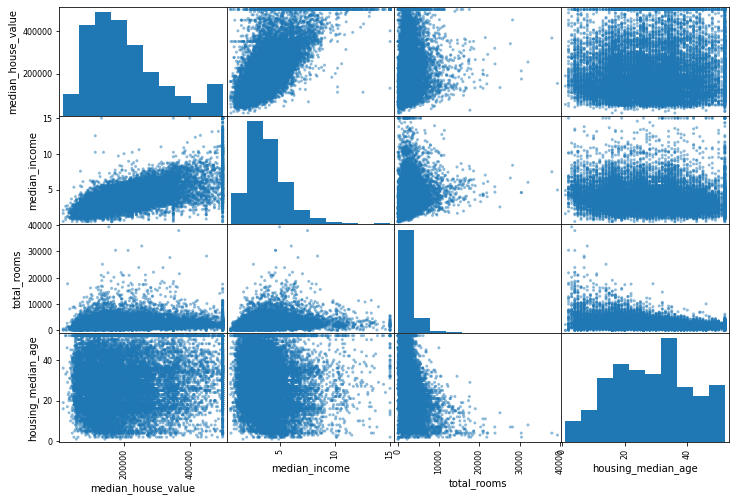

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
              'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


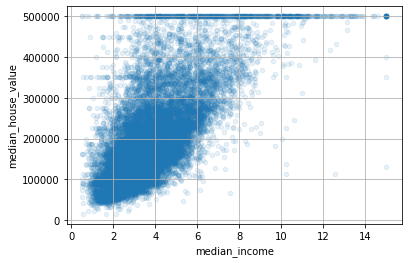

In [ ]:
housing.plot(kind='scatter', x='median_income',
             y='median_house_value', alpha=0.1, grid=True)
plt.show()

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num) # returns a numpy array
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(housing_num)

pandas.core.frame.DataFrame

In [ ]:
X[:5]

array([[-1.2189e+02,  3.7290e+01,  3.8000e+01,  1.5680e+03,  3.5100e+02,
         7.1000e+02,  3.3900e+02,  2.7042e+00],
       [-1.2193e+02,  3.7050e+01,  1.4000e+01,  6.7900e+02,  1.0800e+02,
         3.0600e+02,  1.1300e+02,  6.4214e+00],
       [-1.1720e+02,  3.2770e+01,  3.1000e+01,  1.9520e+03,  4.7100e+02,
         9.3600e+02,  4.6200e+02,  2.8621e+00],
       [-1.1961e+02,  3.6310e+01,  2.5000e+01,  1.8470e+03,  3.7100e+02,
         1.4600e+03,  3.5300e+02,  1.8839e+00],
       [-1.1859e+02,  3.4230e+01,  1.7000e+01,  6.5920e+03,  1.5250e+03,
         4.4590e+03,  1.4630e+03,  3.0347e+00]])

In [ ]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num_columns = housing_num.columns
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_tr = scaler.fit_transform(housing_num)

In [ ]:
housing_tr_df = pd.DataFrame(housing_tr,
                             columns=housing_num.columns,
                             index=housing_num.index)

In [ ]:
housing_tr_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445796,-0.636211,-0.420698,-0.614937
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.034621,-0.998331,-1.022227,1.336459
14650,1.186849,-1.342183,0.186642,-0.313660,-0.155018,-0.433639,-0.093318,-0.532046
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.397333,0.036041,-0.383436,-1.045566
3555,0.492474,-0.659299,-0.926736,1.856193,2.398979,2.724154,2.570975,-0.441437


In [ ]:
housing_tr_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635400e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.272678e-15,2.275755e-15,-2.700521e-16,8.606884e-17,8.031025e-18,-4.347735e-17,9.614940e-18,-2.241021e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.291474e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.814921e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.470978e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.641863e-01,2.684162e-01,2.793106e-01,4.561338e-01
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.375142e+01,3.071047e+01,1.293803e+01,5.839969e+00
